# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2 * numpy.sin(x)  

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x * numpy.sin(x) + numpy.cos(x) * (2 - x**2) - 2

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    a = 0
    dx = (xmax - xmin) / N
    
    for i in numpy.linspace(xmin,xmax - dx,N):
        a = a + f(i) + 4 * f(i + dx/2) + f(i + dx) 

    return dx/6*a

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


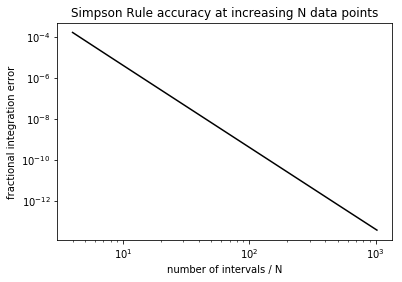

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

vec = numpy.empty(len(panel_counts))
k = -1

for i in panel_counts:
    k = k + 1
    vec [k] = abs(integrate_numeric(x0, x1, i) - result_analytic)/ result_analytic
    
ax = plt.plot(panel_counts, vec, color = "black")
ax = plt.yscale("log")
ax = plt.xscale("log")

ax = plt.xlabel("number of intervals / N")
ax = plt.ylabel("fractional integration error")
ax = plt.title("Simpson Rule accuracy at increasing N data points")

plt.show(ax)


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The number of panels dictates the accuracy of the method selected for the approximation of the integration.
The thinner the panels (the smaller the interval), the better the rule approximates an area under the graph. 

If the panel width is taken to be too large, then the approximation breaks down when we consider graphs that have a majorly wavy look (ex. sin curves). The reason for this effect is due to the fact that during the approximation, a panel may fail to consider the presence of peaks that fall inbetween two extremes of a panel, therefore leading to a loss of data. (The quadratic approximation at that point may fail to approximate sharp peaks)

If the intervals are too small (too large number of panels), the width of the panel itself becomes too small. This causes the machine to produce inaccurate data during the calculation, because of the limited memory allocated to the number of digits recorded for each value. This has been explored before. It has the effect of producing random fluctuations which originate from the lack of digits in one of the values and the need to add random ones to allow the calculation to be computed.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule is another approximation rule, but has lower accuracy compared to the Simpson rule. This difference is due to the different approach to the integration approximation. The trapezium rule uses straight lines as the "top" of the panel, whereas Simpson uses a quadratic, which better describes curved paths. This means that at lower number of panels, the accuracy of the trapezium rule is unreliable, especially considering the nature of the graph that was integrated above ( $x^{2}sin(x)$  has a series of rather sharp peaks).

The panel count has an effect here too, just like with Simpson rule. It follows the same pattern, where a too little panel count would provide an inaccuarate approximation (due to failing to consider sharp peaks or generally sharp curves), and a too large panel count would also produce an inaccurate value because of the reason explained in the answer of the previous question (last paragraph).